In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import json
from sklearn.metrics import accuracy_score

# Read Json File

In [2]:
data = json.load(open('xero_json.json','rb'))

In [3]:
def get_total_current_assets():
    total_current_assets = []
    Get_Total_Current_Assets = 0

    i = 0
    while i < 3:
        Get_Total_Current_Assets = data['GetBalanceSheet'][i]['Reports'][0]['Rows'][3]['Rows'][2]['Cells'][1]['Value']
        total_current_assets.append(Get_Total_Current_Assets)
        i = i + 1
    
    while i <= 14:
        Get_Total_Current_Assets = data['GetBalanceSheet'][i]['Reports'][0]['Rows'][3]['Rows'][1]['Cells'][1]['Value']
        total_current_assets.append(Get_Total_Current_Assets)
        i = i + 1

    while len(total_current_assets) < len(data['GetBalanceSheet']):
        total_current_assets.append(0)

    return total_current_assets

In [4]:
def get_total_cost_of_sales():
    total_cost_of_sales = []
    Get_Total_Cost_of_Sales = 0

    i = 0
    while i < 3:
        Get_Total_Cost_of_Sales = data['GetProfitAndLoss'][i]['Reports'][0]['Rows'][2]['Rows'][1]['Cells'][1]['Value']
        total_cost_of_sales.append(Get_Total_Cost_of_Sales)
        i = i + 1

    while len(total_cost_of_sales) < len(data['GetProfitAndLoss']):
        total_cost_of_sales.append(0)

    return total_cost_of_sales

In [5]:
def get_gross_profit():
    gross_profit = []
    Get_Gross_Profit = 0

    i = 0
    while i < 3:
        Get_Gross_Profit = data['GetProfitAndLoss'][i]['Reports'][0]['Rows'][3]['Rows'][0]['Cells'][1]['Value']
        gross_profit.append(Get_Gross_Profit)
        i = i + 1
    while i < len(data['GetProfitAndLoss']):
        Get_Gross_Profit = data['GetProfitAndLoss'][i]['Reports'][0]['Rows'][2]['Rows'][0]['Cells'][1]['Value']
        gross_profit.append(Get_Gross_Profit)
        i = i + 1
    return gross_profit

In [6]:
def get_total_operating_expenses():
    total_operating_expenses = []
    Get_Total_Operating_Expenses = 0

    i = 0
    while i == 0:
        total_operating_expenses.append(data['GetProfitAndLoss'][i]['Reports'][0]['Rows'][4]['Rows'][0]['Cells'][1]['Value'])
        i = i + 1
    while i == 1:
        total_operating_expenses.append(data['GetProfitAndLoss'][i]['Reports'][0]['Rows'][4]['Rows'][15]['Cells'][1]['Value'])
        i = i + 1
    while i == 2:
        total_operating_expenses.append(data['GetProfitAndLoss'][i]['Reports'][0]['Rows'][4]['Rows'][12]['Cells'][1]['Value'])
        i = i + 1
    while i == 3:
        total_operating_expenses.append(data['GetProfitAndLoss'][i]['Reports'][0]['Rows'][3]['Rows'][10]['Cells'][1]['Value'])
        i = i + 1
    while i == 4:
        total_operating_expenses.append(data['GetProfitAndLoss'][i]['Reports'][0]['Rows'][3]['Rows'][6]['Cells'][1]['Value'])
        i = i + 1
    while i == 5:
        total_operating_expenses.append(data['GetProfitAndLoss'][i]['Reports'][0]['Rows'][3]['Rows'][1]['Cells'][1]['Value'])
        i = i + 1
    while i == 6:
        total_operating_expenses.append(data['GetProfitAndLoss'][i]['Reports'][0]['Rows'][3]['Rows'][2]['Cells'][1]['Value'])
        i = i + 1
    while i < 15:
        Get_Total_Operating_Expenses = data['GetProfitAndLoss'][i]['Reports'][0]['Rows'][3]['Rows'][1]['Cells'][1]['Value']
        total_operating_expenses.append(Get_Total_Operating_Expenses)
        i = i + 1
        
    while len(total_operating_expenses) < len(data['GetProfitAndLoss']):
        total_operating_expenses.append(0)
        
    return total_operating_expenses

In [7]:
def get_total_assets():
    total_assets = []
    Get_Total_Assets = 0

    i = 0
    while i < 7:
        Get_Total_Assets = data['GetBalanceSheet'][i]['Reports'][0]['Rows'][5]['Rows'][0]['Cells'][1]['Value']
        total_assets.append(Get_Total_Assets)
        i = i + 1
    while i < 15:
        Get_Total_Assets = data['GetBalanceSheet'][i]['Reports'][0]['Rows'][4]['Rows'][0]['Cells'][1]['Value']
        total_assets.append(Get_Total_Assets)
        i = i + 1
    while i == 15:
        Get_Total_Assets = data['GetBalanceSheet'][i]['Reports'][0]['Rows'][3]['Rows'][0]['Cells'][1]['Value']
        total_assets.append(Get_Total_Assets)
        i = i + 1
    while len(total_assets) < len(data['GetBalanceSheet']):
        total_assets.append(0)

    return total_assets

In [8]:
def get_total_current_liabilities():
    total_current_liabilities = []
    Get_Total_Current_Liabilities = 0

    i = 0
    while i < 7:
        Get_Total_Current_Liabilities = data['GetBalanceSheet'][i]['Reports'][0]['Rows'][8]['Rows'][3]['Cells'][1]['Value']
        total_current_liabilities.append(Get_Total_Current_Liabilities)
        i = i + 1
    while i < 15:
        Get_Total_Current_Liabilities = data['GetBalanceSheet'][i]['Reports'][0]['Rows'][7]['Rows'][3]['Cells'][1]['Value']
        total_current_liabilities.append(Get_Total_Current_Liabilities)
        i = i + 1
    while i == 15:
        total_current_liabilities.append(data['GetBalanceSheet'][i]['Reports'][0]['Rows'][6]['Rows'][2]['Cells'][1]['Value'])
        i = i + 1
    while i < len(data['GetBalanceSheet']):
        Get_Total_Current_Liabilities = data['GetBalanceSheet'][i]['Reports'][0]['Rows'][3]['Rows'][1]['Cells'][1]['Value']
        total_current_liabilities.append(Get_Total_Current_Liabilities)
        i = i + 1

    return total_current_liabilities

In [9]:
def get_total_liabilities():
    total_liabilities = []
    Get_Total_Liabilities = 0

    i = 0
    while i < 7:
        Get_Total_Liabilities = data['GetBalanceSheet'][i]['Reports'][0]['Rows'][9]['Rows'][0]['Cells'][1]['Value']
        total_liabilities.append(Get_Total_Liabilities)
        i = i + 1
    while i < 15:
        Get_Total_Liabilities = data['GetBalanceSheet'][i]['Reports'][0]['Rows'][8]['Rows'][0]['Cells'][1]['Value']
        total_liabilities.append(Get_Total_Liabilities)
        i = i + 1
    while i == 15:
        total_liabilities.append(data['GetBalanceSheet'][i]['Reports'][0]['Rows'][7]['Rows'][0]['Cells'][1]['Value'])
        i = i + 1
    while i < len(data['GetBalanceSheet']):
        Get_Total_Liabilities = data['GetBalanceSheet'][i]['Reports'][0]['Rows'][4]['Rows'][0]['Cells'][1]['Value']
        total_liabilities.append(Get_Total_Liabilities)
        i = i + 1

    return total_liabilities

In [10]:
def get_total_equity():
    total_equity = []
    Get_Total_Equity = 0

    i = 0
    while i < 7:
        Get_Total_Equity = data['GetBalanceSheet'][i]['Reports'][0]['Rows'][10]['Rows'][4]['Cells'][1]['Value']
        total_equity.append(Get_Total_Equity)
        i = i + 1
    while i == 7:
        total_equity.append(data['GetBalanceSheet'][i]['Reports'][0]['Rows'][9]['Rows'][4]['Cells'][1]['Value'])
        i = i + 1
    while i < 15:
        Get_Total_Equity = data['GetBalanceSheet'][i]['Reports'][0]['Rows'][9]['Rows'][2]['Cells'][1]['Value']
        total_equity.append(Get_Total_Equity)
        i = i + 1
    while i == 15:
        total_equity.append(data['GetBalanceSheet'][i]['Reports'][0]['Rows'][8]['Rows'][1]['Cells'][1]['Value'])
        i = i + 1
    while i < len(data['GetBalanceSheet']):
        Get_Total_Equity = data['GetBalanceSheet'][i]['Reports'][0]['Rows'][5]['Rows'][1]['Cells'][1]['Value']
        total_equity.append(Get_Total_Equity)
        i = i + 1
    return total_equity

In [11]:
def get_total_liabilities_and_equity():
    total_liabilities_and_equity = []
    Get_Total_Liabilities_and_Equity = 0

    i = 0
    while i < 7:
        Get_Total_Liabilities_and_Equity = data['GetBalanceSheet'][i]['Reports'][0]['Rows'][11]['Rows'][0]['Cells'][1]['Value']
        total_liabilities_and_equity.append(Get_Total_Liabilities_and_Equity)
        i = i + 1
    while i < 15:
        Get_Total_Liabilities_and_Equity = data['GetBalanceSheet'][i]['Reports'][0]['Rows'][10]['Rows'][0]['Cells'][1]['Value']
        total_liabilities_and_equity.append(Get_Total_Liabilities_and_Equity)
        i = i + 1
    while i == 15:
        total_liabilities_and_equity.append(data['GetBalanceSheet'][i]['Reports'][0]['Rows'][9]['Rows'][0]['Cells'][1]['Value'])
        i = i + 1
    while i < len(data['GetBalanceSheet']):
        Get_Total_Liabilities_and_Equity = data['GetBalanceSheet'][i]['Reports'][0]['Rows'][6]['Rows'][0]['Cells'][1]['Value']
        total_liabilities_and_equity.append(Get_Total_Liabilities_and_Equity)
        i = i + 1
    return total_liabilities_and_equity

In [12]:
def get_net_income():
    net_income = []
    Get_Net_Income = 0

    i = 0
    while i < 3:
        Get_Net_Income = data['GetProfitAndLoss'][i]['Reports'][0]['Rows'][7]['Rows'][0]['Cells'][1]['Value']
        net_income.append(Get_Net_Income)
        i = i + 1
    
    while i < len(data['GetProfitAndLoss']):
        Get_Net_Income = data['GetProfitAndLoss'][i]['Reports'][0]['Rows'][6]['Rows'][0]['Cells'][1]['Value']
        net_income.append(Get_Net_Income)
        i = i + 1
    return net_income

In [13]:
def get_total_revenue():
    total_revenue = []
    Get_Total_Revenue = 0

    i = 0
    while i < 7:
        Get_total_Revenue = data['GetProfitAndLoss'][i]['Reports'][0]['Rows'][1]['Rows'][1]['Cells'][1]['Value']
        total_revenue.append(Get_total_Revenue)
        i = i + 1
    while i == 7:
        Get_total_Revenue = data['GetProfitAndLoss'][i]['Reports'][0]['Rows'][1]['Rows'][2]['Cells'][1]['Value']
        total_revenue.append(Get_total_Revenue)
        i = i + 1
    while i < 15:
        Get_total_Revenue = data['GetProfitAndLoss'][i]['Reports'][0]['Rows'][1]['Rows'][1]['Cells'][1]['Value']
        total_revenue.append(Get_total_Revenue)
        i = i + 1
    while len(total_revenue) < len(data['GetProfitAndLoss']):
        total_revenue.append(0)
    return total_revenue

In [14]:
def search_invoices():
    invoices = []
    single_invoice = []
    Type = 0
    Date = 0
    Amount = 0
    i = 0
    while i < len(data['GetInvoices']['Invoices']):
        Type = data['GetInvoices']["Invoices"][i]['Type']
        Date = data['GetInvoices']["Invoices"][i]['Date'][0:7]
        Amount = data['GetInvoices']["Invoices"][i]['Total']
        single_invoice = [Type, Date, Amount]
        invoices.append(single_invoice)
        i = i + 1
    return invoices

In [15]:
def sum_of_month(date):
    sum = 0
    for i in date:
        sum = sum + i
    return sum

In [16]:
def get_total_amount_of_invoice():
    date = 0
    get_date = []
    amount_of_invoice = []
    total_amount_of_invoice = []
    b = {}
    month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12,month13,month14,month15 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
    for one in search_invoices():
        for j in one:
            if j == "ACCREC":
                del one[0]
                amount_of_invoice.append(one)
                
    for k in amount_of_invoice:
        date = k[0]
        get_date.append(date)
    get_date.sort(reverse=True)
    month = b.fromkeys(get_date)
    date_new = list(month.keys())
    
    for cal in amount_of_invoice:
        if cal[0] == date_new[0]:
            month1.append(cal[1])
        elif cal[0] == date_new[1]:
            month2.append(cal[1])
        elif cal[0] == date_new[2]:
            month3.append(cal[1])
        elif cal[0] == date_new[3]:
            month4.append(cal[1])
        elif cal[0] == date_new[4]:
            month5.append(cal[1])
        elif cal[0] == date_new[5]:
            month6.append(cal[1])
        elif cal[0] == date_new[6]:
            month7.append(cal[1])
        elif cal[0] == date_new[7]:
            month8.append(cal[1])
        elif cal[0] == date_new[8]:
            month9.append(cal[1])
        elif cal[0] == date_new[9]:
            month10.append(cal[1])
        elif cal[0] == date_new[10]:
            month11.append(cal[1])
        elif cal[0] == date_new[11]:
            month12.append(cal[1])
        elif cal[0] == date_new[12]:
            month13.append(cal[1])
        elif cal[0] == date_new[13]:
            month14.append(cal[1])
        elif cal[0] == date_new[14]:
            month15.append(cal[1])
        
    total_amount_of_invoice = [sum_of_month(month1),sum_of_month(month2),
                               sum_of_month(month3),sum_of_month(month4),
                               sum_of_month(month5),sum_of_month(month6),
                               sum_of_month(month7),sum_of_month(month8),
                               sum_of_month(month9),sum_of_month(month10),
                               sum_of_month(month11),sum_of_month(month12),
                               sum_of_month(month13),sum_of_month(month14),
                               sum_of_month(month15)]
    
    while len(total_amount_of_invoice) < len(data['GetProfitAndLoss']):
        total_amount_of_invoice.append(0)
    
    return total_amount_of_invoice

In [17]:
def get_total_amount_of_bill():
    date = 0
    get_date = []
    amount_of_bill = []
    total_amount_of_bill = []
    b = {}
    month1,month2,month3,month4,month5,month6,month7,month8,month9,month10,month11,month12,month13,month14,month15 = [],[],[],[],[],[],[],[],[],[],[],[],[],[],[]
    for one in search_invoices():
        for j in one:
            if j == "ACCPAY":
                del one[0]
                amount_of_bill.append(one)
                
    for k in amount_of_bill:
        date = k[0]
        get_date.append(date)
    get_date.sort(reverse=True)
    month = b.fromkeys(get_date)
    date_new = list(month.keys())
    
    for cal in amount_of_bill:
        if cal[0] == date_new[0]:
            month1.append(cal[1])
        elif cal[0] == date_new[1]:
            month2.append(cal[1])
        elif cal[0] == date_new[2]:
            month3.append(cal[1])
        elif cal[0] == date_new[3]:
            month4.append(cal[1])
        elif cal[0] == date_new[4]:
            month5.append(cal[1])
        elif cal[0] == date_new[5]:
            month6.append(cal[1])
        elif cal[0] == date_new[6]:
            month7.append(cal[1])
        elif cal[0] == date_new[7]:
            month8.append(cal[1])
        elif cal[0] == date_new[8]:
            month9.append(cal[1])
        elif cal[0] == date_new[9]:
            month10.append(cal[1])
        elif cal[0] == date_new[10]:
            month11.append(cal[1])
        elif cal[0] == date_new[11]:
            month12.append(cal[1])
        elif cal[0] == date_new[12]:
            month13.append(cal[1])
        elif cal[0] == date_new[13]:
            month14.append(cal[1])
        elif cal[0] == date_new[14]:
            month15.append(cal[1])
        
    total_amount_of_bill = [sum_of_month(month1),sum_of_month(month2),
                               sum_of_month(month3),sum_of_month(month4),
                               sum_of_month(month5),sum_of_month(month6),
                               sum_of_month(month7),sum_of_month(month8),
                               sum_of_month(month9),sum_of_month(month10),
                               sum_of_month(month11),sum_of_month(month12),
                               sum_of_month(month13),sum_of_month(month14),
                               sum_of_month(month15)]

    while len(total_amount_of_bill) < len(data['GetProfitAndLoss']):
        total_amount_of_bill.append(0)

    return total_amount_of_bill

In [18]:
def get_date():
    date = []

    i = 0
    while i < len(data['GetBalanceSheet']):
        date.append(data['GetBalanceSheet'][i]["Reports"][0]['Rows'][0]['Cells'][1]['Value'][3:11])
        i = i + 1

    return date

In [19]:
Date = get_date()
Net_Income = get_net_income()
Total_Revenue = get_total_revenue()
Total_amount_of_Invoice = get_total_amount_of_invoice()
Total_amount_of_Bill = get_total_amount_of_bill()
Total_Cost_of_Sales = get_total_cost_of_sales()
Gross_Profit = get_gross_profit()
Total_Operating_Expenses = get_total_operating_expenses()
Total_Current_Assets = get_total_current_assets()
Total_Assets = get_total_assets()
Total_Current_Liabilities = get_total_current_liabilities()
Total_Liabilities = get_total_liabilities()
Total_Equity = get_total_equity()
Total_Liabilities_and_Equity = get_total_liabilities_and_equity()
    
dic = {"Date" : Date,
        "Net_Income" : Net_Income,
        "Total_Revenue" : Total_Revenue,
        "Total_amount_of_Invoice" : Total_amount_of_Invoice,
        "Total_amount_of_Bill" : Total_amount_of_Bill,
        "Total_Cost_of_Sales" : Total_Cost_of_Sales,
        "Gross_Profit" : Gross_Profit,
        "Total_Operating_Expenses" : Total_Operating_Expenses,
        "Total_Current_Assets" : Total_Current_Assets,
        "Total_Assets" : Total_Assets,
        "Total_Current_Liabilities" : Total_Current_Liabilities,
        "Total_Liabilities" : Total_Liabilities,
        "Total_Equity" : Total_Equity,
        "Total_Liabilities_and_Equity" : Total_Liabilities_and_Equity}

pd.DataFrame(dic).iloc[::-1].to_csv("Data.csv", index=False)

Change the data of JSON file into CSV format

# Basic Information

In [20]:
Xero = pd.read_csv("Data.csv")

In [21]:
Xero['Date'] = pd.to_datetime(Xero['Date'])
Xero

,Date,Net_Income,Total_Revenue,Total_amount_of_Invoice,Total_amount_of_Bill,Total_Cost_of_Sales,Gross_Profit,Total_Operating_Expenses,Total_Current_Assets,Total_Assets,Total_Current_Liabilities,Total_Liabilities,Total_Equity,Total_Liabilities_and_Equity
0,2018-09-01,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
1,2018-10-01,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
2,2018-11-01,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
3,2018-12-01,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
4,2019-01-01,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
5,2019-02-01,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
6,2019-03-01,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
7,2019-04-01,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
8,2019-05-01,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
9,2019-06-01,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,4130.98,6130.98,6130.98,-2000.00,4130.98


In [22]:
Xero.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Date                          25 non-null     datetime64[ns]
 1   Net_Income                    25 non-null     float64       
 2   Total_Revenue                 25 non-null     float64       
 3   Total_amount_of_Invoice       25 non-null     float64       
 4   Total_amount_of_Bill          25 non-null     float64       
 5   Total_Cost_of_Sales           25 non-null     float64       
 6   Gross_Profit                  25 non-null     float64       
 7   Total_Operating_Expenses      25 non-null     float64       
 8   Total_Current_Assets          25 non-null     float64       
 9   Total_Assets                  25 non-null     float64       
 10  Total_Current_Liabilities     25 non-null     float64       
 11  Total_Liabilities             25 n

There are no missing values in the dataset

In [23]:
Xero.Net_Income.describe()

count        25.000000
mean      97080.995600
std      221048.395305
min           0.000000
25%           0.000000
50%         366.670000
75%       53238.890000
max      987114.880000
Name: Net_Income, dtype: float64

skew:  3.2047191507115382


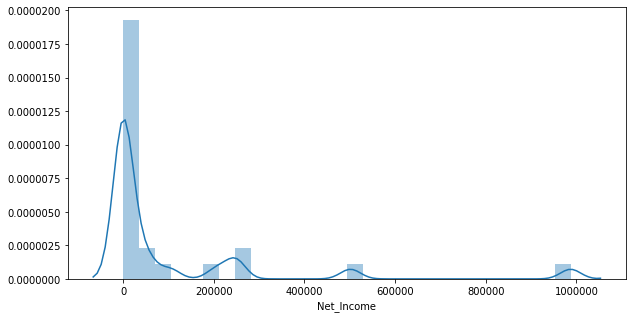

In [24]:
plt.figure(figsize = (10,5))
print('skew: ',Xero.Net_Income.skew())
sns.distplot(Xero['Net_Income'])

We can see that the target variable is skewed.

# Correlation

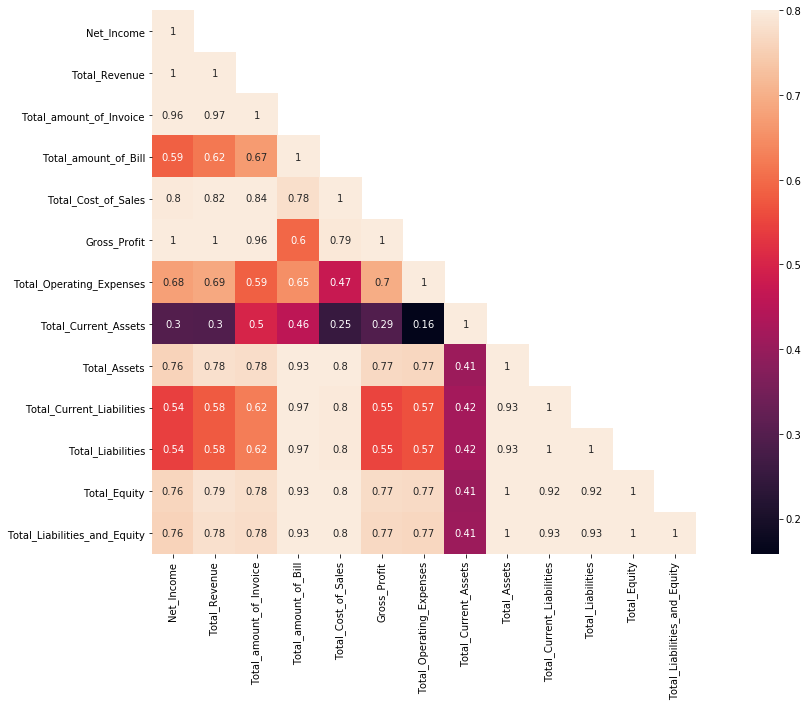

In [25]:
corrMat = Xero.corr()
mask = np.array(corrMat)
mask[np.tril_indices_from(mask)] = False
plt.subplots(figsize=(20,10))
plt.xticks(rotation=60)
sns.heatmap(corrMat, mask=mask, vmax=0.8, square=True,annot=True)

In [26]:
print(corrMat["Net_Income"].sort_values(ascending=False))

Net_Income                      1.000000
Gross_Profit                    0.999633
Total_Revenue                   0.998756
Total_amount_of_Invoice         0.963698
Total_Cost_of_Sales             0.796643
Total_Equity                    0.764456
Total_Liabilities_and_Equity    0.758614
Total_Assets                    0.758614
Total_Operating_Expenses        0.676452
Total_amount_of_Bill            0.586740
Total_Liabilities               0.542950
Total_Current_Liabilities       0.542950
Total_Current_Assets            0.296165
Name: Net_Income, dtype: float64


In [27]:
dic = corrMat['Net_Income'].to_dict()
lis = []
for i in dic.values():
    if abs(i) < 0.4:
        lis.append(i)
        
for j in dic.items():
    for k in lis:
        if j[1] == k:
            del Xero[j[0]]

Delet the feature which corelation is less than 0.4

In [28]:
Xero

,Date,Net_Income,Total_Revenue,Total_amount_of_Invoice,Total_amount_of_Bill,Total_Cost_of_Sales,Gross_Profit,Total_Operating_Expenses,Total_Assets,Total_Current_Liabilities,Total_Liabilities,Total_Equity,Total_Liabilities_and_Equity
0,2018-09-01,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
1,2018-10-01,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
2,2018-11-01,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
3,2018-12-01,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
4,2019-01-01,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
5,2019-02-01,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
6,2019-03-01,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
7,2019-04-01,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
8,2019-05-01,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,2000.00,2000.00,-2000.00,0.00
9,2019-06-01,0.00,0.00,0.00,0.00,0.0,0.00,0.00,4130.98,6130.98,6130.98,-2000.00,4130.98


In [29]:
Xero.to_csv("Features.csv", index=False)

Get the new dataframe

# Scales data and separates data into training data and test data

In [30]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor

In [31]:
model_df = Xero

In [32]:
def tts(data):
    data = data.drop(['Net_Income', 'Date'], axis=1)
    train, test = data[0:22].values, data[-15:].values

    return train, test

train, test = tts(model_df)

In [33]:
train.shape, test.shape

((22, 11), (15, 11))

In [34]:
def scale_data(train_set, test_set):
    scaler = MinMaxScaler(feature_range=(-1, 1))
    scaler = scaler.fit(train_set)
    
    train_set = train_set.reshape(train_set.shape[0], train_set.shape[1])
    train_set_scaled = scaler.transform(train_set)

    test_set = test_set.reshape(test_set.shape[0], test_set.shape[1])
    test_set_scaled = scaler.transform(test_set)

    X_train, y_train = train_set_scaled[:,1:], train_set_scaled[:, 0:1].ravel()
    X_test, y_test = test_set_scaled[:,1:], test_set_scaled[:, 0:1].ravel()
    
    return X_train, y_train, X_test, y_test, scaler

The purpose of scaling data is to eliminate the difference of characteristics and order of magnitude between different samples, and convert it into a dimensionless relative value. The value of each sample characteristic quantify is in the same order of magnitude.

In [35]:
def undo_scaling(y_pred, x_test, scaler_obj, lstm=False):
    y_pred = y_pred.reshape(y_pred.shape[0],1, 1)
    
    if not lstm:
        x_test = x_test.reshape(x_test.shape[0], 1, x_test.shape[1])
        
    pred_test_set = []
    for index in range(0, len(y_pred)):
        pred_test_set.append(np.concatenate([y_pred[index], x_test[index]], axis=1))
    
    pred_test_set = np.array(pred_test_set)
    pred_test_set = pred_test_set.reshape(pred_test_set.shape[0], pred_test_set.shape[2])
    
    pred_test_set_inverted = scaler_obj.inverse_transform(pred_test_set)
    
    return pred_test_set_inverted

For visualizing and comparing results, undoes the scaling effect on predictions.

In [36]:
def predict_df(unscaled_predictions, original_df):
    result_list = []
    NI_dates = list(original_df[-16:].Date)
    act_NI = list(original_df[-22:].Net_Income)

    for index in range(0, len(unscaled_predictions)):
        result_dict = {}
        result_dict['pred_value'] = int(unscaled_predictions[index][0] + act_NI[index])
        result_dict['date'] = NI_dates[index+1]
        result_list.append(result_dict)

    df_result = pd.DataFrame(result_list)

    return df_result

Generates a dataframe that shows the predicted net income for each month for plotting results.

In [37]:
model_scores = {}

def get_scores(unscaled_df, original_df, model_name):
    rmse = np.sqrt(mean_squared_error(original_df.Net_Income[-15:],unscaled_df.pred_value[-15:]))
    mae = mean_absolute_error(original_df.Net_Income[-15:], unscaled_df.pred_value[-15:])
    r2 = r2_score(original_df.Net_Income[-15:], unscaled_df.pred_value[-15:])
    model_scores[model_name] = [rmse, mae]
    
    print(model_name)
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae/100}%")
    print(f"R2 Score: {r2}")

Prints the root mean squared error, mean absolute error

In [38]:
def plot_results(results, original_df, model_name):
    fig, ax = plt.subplots(figsize=(15, 5))
    sns.lineplot(original_df.Date, original_df.Net_Income, data=original_df, ax=ax, label='Original', color='mediumblue')
    sns.lineplot(results.date, results.pred_value, data=results, ax=ax, label='Predicted', color='red')
    ax.set(xlabel='Date', ylabel='Net Income', title=f"{model_name} Net Income Forecasting Prediction")
    ax.legend()
    sns.despine
    plt.savefig(f'{model_name}_forecast.png')

Plots predictions over original data to visualize results.

# Build Model

In [43]:
def regressive_model(train_data, test_data, model, model_name):
    
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)
    
    mod = model
    mod.fit(X_train, y_train)
    predictions = mod.predict(X_test)
    
    original_df = pd.read_csv('Features.csv')
    unscaled = undo_scaling(predictions, X_test, scaler_object)
    unscaled_df = predict_df(unscaled, original_df)
    
    plot_results(unscaled_df, original_df,model_name)
    get_scores(unscaled_df, original_df, model_name)
    
    a = original_df['Date'][10:]
    b = unscaled_df['pred_value']
        
    pred_df = pd.DataFrame(zip(a,b), columns = ['Date', 'prediction'])
    pred_dic = pred_df.set_index('Date').T.to_dict('list')
    pred_outcome = {model_name: pred_dic}

    return pred_outcome

Runs regressive models in SKlearn framework. First calls scale_data to split into X and y and scale the data. Then fits and predicts. Finally, predictions are unscaled, scores are printed, and results are plotted and saved.

##### Model 1 - Linear regression

LinearRegression
RMSE: 71178.67717845137
MAE: 252.8740733333333%
R2 Score: 0.9251726500324237
[-5.83854689e-16  2.17194960e-16  0.00000000e+00  1.00000000e+00
  2.10601132e-16  2.62827440e-17  1.43688131e-16  1.43688131e-16
 -3.38458181e-17  2.62827440e-17]


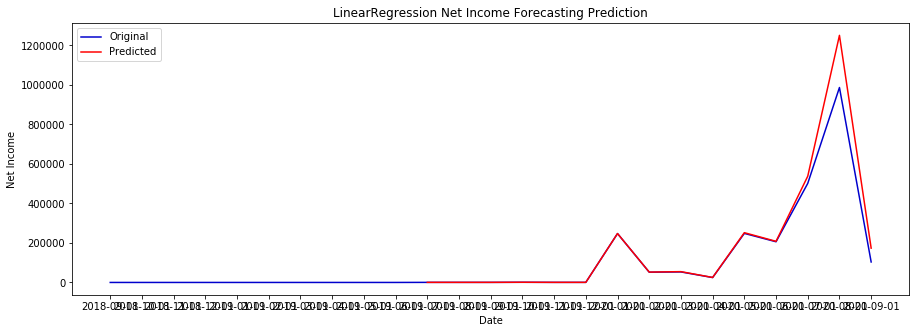

In [42]:
Linear_Regression = regressive_model(train, test, LinearRegression(), 'LinearRegression')

##### Model 2 - Random forest regressor

RandomForest
RMSE: 150517.39468485204
MAE: 626.9421%
R2 Score: 0.6653938456360708


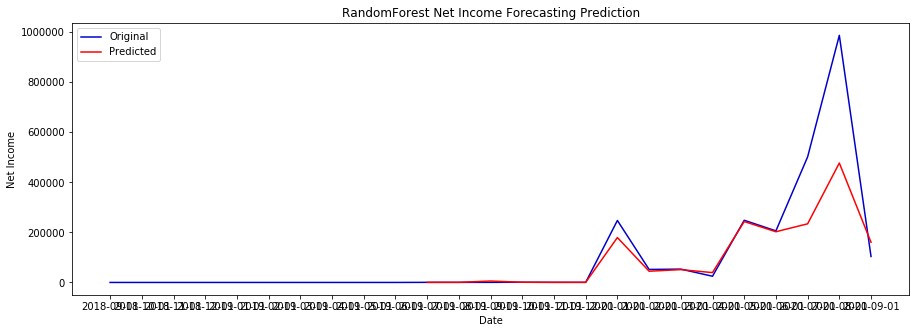

In [248]:
Random_Forest = regressive_model(train, test, RandomForestRegressor(n_estimators = 10),'RandomForest')

##### Model 3 - XGBoost

XGBoost
RMSE: 142121.5823977468
MAE: 502.17312666666675%
R2 Score: 0.7016812103584218


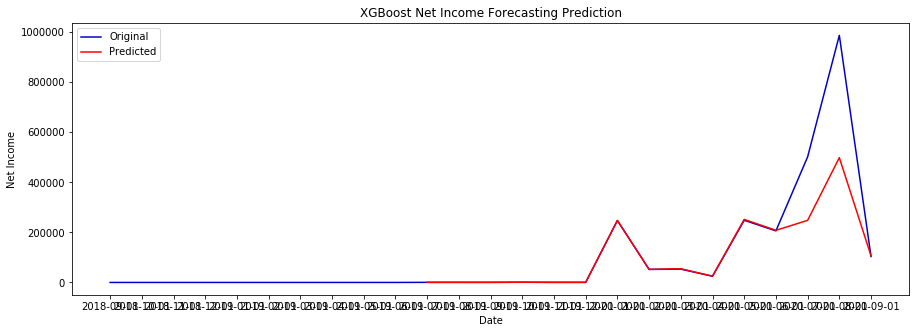

In [249]:
XGBoost = regressive_model(train, test, XGBRegressor(n_estimators=100, learning_rate=0.2, objective='reg:squarederror'),'XGBoost')

##### Model 4 - Long Short - Term Memory

In [250]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.layers import LSTM

In [251]:
def lstm_model(train_data, test_data):
    X_train, y_train, X_test, y_test, scaler_object = scale_data(train_data, test_data)
    
    X_train = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
    X_test = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])
    
    model = Sequential()
    model.add(LSTM(4, batch_input_shape=(1, X_train.shape[1], X_train.shape[2]), stateful=True))
    model.add(Dense(1))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    model.fit(X_train, y_train, epochs=200, batch_size=1, verbose=1, shuffle=False)
    predictions = model.predict(X_test, batch_size=1)
    
    original_df = pd.read_csv('Features.csv')
    unscaled = undo_scaling(predictions, X_test, scaler_object, lstm=True)
    unscaled_df = predict_df(unscaled, original_df)
    
    get_scores(unscaled_df, original_df, 'LSTM')
    plot_results(unscaled_df, original_df, 'LSTM')
    
    a = original_df['Date'][10:]
    b = unscaled_df['pred_value']
        
    pred_df = pd.DataFrame(zip(a,b), columns = ['Date', 'prediction'])
    pred_dic = pred_df.set_index('Date').T.to_dict('list')
    pred_outcome = {'LSTM':pred_dic}
    
    return pred_outcome

Epoch 1/200
22/22 [==============================] - 0s 861us/step - loss: 0.8876
Epoch 2/200
22/22 [==============================] - 0s 771us/step - loss: 0.8159
Epoch 3/200
22/22 [==============================] - 0s 680us/step - loss: 0.7376
Epoch 4/200
22/22 [==============================] - 0s 771us/step - loss: 0.6313
Epoch 5/200
22/22 [==============================] - 0s 816us/step - loss: 0.5162
Epoch 6/200
22/22 [==============================] - 0s 680us/step - loss: 0.4242
Epoch 7/200
22/22 [==============================] - 0s 635us/step - loss: 0.3533
Epoch 8/200
22/22 [==============================] - 0s 635us/step - loss: 0.3043
Epoch 9/200
22/22 [==============================] - 0s 680us/step - loss: 0.2752
Epoch 10/200
22/22 [==============================] - 0s 680us/step - loss: 0.2587
Epoch 11/200
22/22 [==============================] - 0s 725us/step - loss: 0.2485
Epoch 12/200
22/22 [==============================] - 0s 680us/step - loss: 0.2413
Epoch 13/200


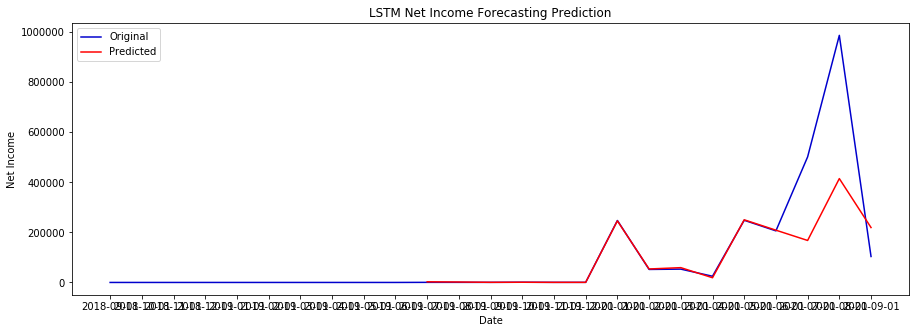

In [252]:
LSTM = lstm_model(train, test)

# Feature forecast

In [253]:
from collections import deque
import itertools

def moving_average(data_array, n=3):
    '''
    Calcuate the moving average based on the specific data array.
    :param data_array: the array stored data to be calculated.
    :param n: the number of data in one time
    :return: Generate which contains the result
     '''
    it = iter(data_array)
    
    d = deque(itertools.islice(it, n - 1))
    s = sum(d)
    # In the first round, to avoid getting extra element, so need zero in the head of queue.
    d.appendleft(0)
    for elem in it:
        s += elem - d.popleft()
        d.append(elem)
        yield s / float(n)

In [254]:
def MA(name):
    Xero = pd.read_csv('Features.csv')
    Date = Xero['Date'][2:].values.tolist()
    features = Xero[name].values.tolist()
    features_MA = list(moving_average(features))
    
    #Put these lists together
    a = Date
    b = features_MA   
    pred_df = pd.DataFrame(zip(a,b), columns = ['Date', 'prediction'])
    pred_dic = pred_df.set_index('Date').T.to_dict('list')
    pred_outcome = {'Moving Average':pred_dic}
    
    return pred_outcome

In [255]:
#You can change different features to get different outcome
MovingAverage = MA('Net_Income')

In [256]:
MovingAverage

{'Moving Average': {'2018-11-01': [0.0],
  '2018-12-01': [0.0],
  '2019-01-01': [0.0],
  '2019-02-01': [0.0],
  '2019-03-01': [0.0],
  '2019-04-01': [0.0],
  '2019-05-01': [0.0],
  '2019-06-01': [0.0],
  '2019-07-01': [122.55666666666667],
  '2019-08-01': [243.28],
  '2019-09-01': [363.50333333333333],
  '2019-10-01': [515.3933333333333],
  '2019-11-01': [517.5600000000001],
  '2019-12-01': [519.5600000000001],
  '2020-01-01': [82767.76333333334],
  '2020-02-01': [99960.79666666668],
  '2020-03-01': [117584.87],
  '2020-04-01': [43329.27666666665],
  '2020-05-01': [108805.29666666665],
  '2020-06-01': [159744.9833333333],
  '2020-07-01': [318669.39666666667],
  '2020-08-01': [564915.7466666667],
  '2020-09-01': [530795.38]}}

In [1]:
def ready_df():
    Xero = pd.read_csv("Features.csv")
    n = len(Xero["Net_Income"])
    Xero.drop(["Date", "Net_Income","Total_Revenue"], axis=1, inplace=True)
    df = Xero[(n - 4) : (n - 1)]

    df = df.reset_index(drop = True)

    return df

def get_months_feature(numbers):
    df = ready_df()
    features = list(df)

    m = 0
    times = 0
    
    while times < numbers:
        new_df = []
        for i in features:
            data = list(moving_average(df[i][m+times : m+3+times]))
            new_df.extend(data)
        df.loc[3+times] = new_df
        times = times + 1

    df.to_csv("forecast_feature.csv", index=False)

def get_date_num(numbers):
    df = pd.read_csv("Features.csv")
    n = len(df["Net_Income"])

    get_months = []

    t = 0
    
    year1 = df["Date"][n-2][0]+df["Date"][n-2][1]
    year2 = df["Date"][n-2][2]+df['Date'][n-2][3]
    conn1 = df["Date"][n-2][4]
    month = df["Date"][n-2][5]+df["Date"][n-2][6]
    conn2 = df["Date"][n-2][7]
    day = df['Date'][n-2][8]+df['Date'][n-2][9]
    
    while t < numbers:
        month = int(month) + 1
        if month == 13:
            year2 = int(year2) + 1
            month = 1
        if year2 == 100:
            year1 = int(year1) + 1
            year2 = '00'
        get_months.append(str(year1)+str(year2)+conn1+str(month)+conn2+day)
        t = t + 1

    return get_months

# Save Prediction

In [257]:
def to_json(x):
    jsonData = json.dumps(x, indent=1)
    fileObject = open('Outcome.json', 'a+')
    fileObject.write(jsonData)
    fileObject.close()

Save all the predictions to json file

In [258]:
to_json(Linear_Regression)
to_json(Random_Forest)
to_json(XGBoost)
to_json(LSTM)
to_json(MovingAverage)